# COVID-19 Data Analysis Project (OWID Dataset)

This notebook is structured to explicitly satisfy the required components:
- **Data Wrangling**
- **Exploratory Data Analysis (EDA)**
- **Feature Engineering & Selection**
- **Probability & Hypothesis Testing**
- **Dimensionality Reduction (PCA)**

## Table of Contents
1. Setup & Imports
2. Load Dataset & Initial Inspection
3. EDA — Before Cleaning
4. Data Wrangling & Cleaning
5. Outlier Handling
6. EDA — After Cleaning
7. Feature Engineering
8. Aggregation & EDA (Global & Regional)
9. Country-Level Analysis
10. Correlation Analysis
11. Feature Selection
12. Probability & Distribution Fitting
13. Hypothesis Testing
14. PCA (Dimensionality Reduction)
15. cleaned dataset


### **Part 1: Setup & Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.feature_selection import RFE

plt.style.use("dark_background")
sns.set_palette("Purples")


### **Part 2: Load Dataset & Initial Inspection**

In [2]:
df = pd.read_csv("owid-covid-data.csv")

print("Shape before cleaning:", df.shape)
df.head()


Shape before cleaning: (44785, 41)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44785 entries, 0 to 44784
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         44521 non-null  object 
 1   continent                        44257 non-null  object 
 2   location                         44785 non-null  object 
 3   date                             44785 non-null  object 
 4   total_cases                      44182 non-null  float64
 5   new_cases                        43982 non-null  float64
 6   new_cases_smoothed               43200 non-null  float64
 7   total_deaths                     44182 non-null  float64
 8   new_deaths                       43982 non-null  float64
 9   new_deaths_smoothed              43200 non-null  float64
 10  total_cases_per_million          43918 non-null  float64
 11  new_cases_per_million            43918 non-null  float64
 12  new_cases_smoothed

In [33]:
numeric_cols =df.select_dtypes(include="number").columns

numeric_cols = [c for c in numeric_cols if c in df.columns]
df[numeric_cols].describe().T



,count,mean,std,min,25%,50%,75%,max
total_cases,44257.0,4.678347e+04,2.983096e+05,0.000000,5.400000e+01,9.420000e+02,9.333000e+03,6.724667e+06
new_cases,44257.0,6.658107e+02,4.187549e+03,-1202.250000,0.000000e+00,9.000000e+00,1.350000e+02,7.842700e+04
new_cases_smoothed,44257.0,6.700298e+02,4.156938e+03,-552.000000,5.710000e-01,1.385700e+01,1.414290e+02,9.319857e+04
total_deaths,44257.0,1.939157e+03,1.055358e+04,0.000000,0.000000e+00,1.800000e+01,2.000000e+02,1.985890e+05
new_deaths,44257.0,1.920600e+01,1.122872e+02,-174.750000,0.000000e+00,0.000000e+00,2.000000e+00,2.905750e+03
new_deaths_smoothed,44257.0,2.115026e+01,1.149004e+02,-232.143000,0.000000e+00,1.430000e-01,2.571000e+00,2.715143e+03
total_cases_per_million,44257.0,1.762171e+03,3.802316e+03,0.000000,2.737300e+01,2.655010e+02,1.742210e+03,4.266381e+04
new_cases_per_million,44257.0,1.900780e+01,4.598741e+01,-129.397500,0.000000e+00,1.289000e+00,1.394800e+01,6.237572e+02
new_cases_smoothed_per_million,44257.0,2.257520e+01,5.500621e+01,-269.978000,1.510000e-01,2.812000e+00,1.702000e+01,8.829240e+02
total_deaths_per_million,44257.0,5.470999e+01,1.402085e+02,0.000000,0.000000e+00,4.562000e+00,3.306600e+01,1.237551e+03


In [5]:
object_cols = df.select_dtypes(include="object").columns

object_cols = [c for c in object_cols if c in df.columns]

df.describe(include="object").T


,count,unique,top,freq
iso_code,44521,211,AFG,264
continent,44257,6,Europe,11814
location,44785,212,Afghanistan,264
date,44785,264,2020-09-03,212
tests_units,18374,5,tests performed,9548


In [6]:
missing_ratio_before = df.isnull().mean().sort_values(ascending=False)
missing_ratio_before.head(15)


,0
new_tests,0.650620
new_tests_per_thousand,0.650620
total_tests,0.642246
total_tests_per_thousand,0.642246
tests_per_case,0.639411
positive_rate,0.630836
new_tests_smoothed,0.607726
new_tests_smoothed_per_thousand,0.607726
tests_units,0.589729
handwashing_facilities,0.583387


### **Part 3: EDA — BEFORE CLEANING**

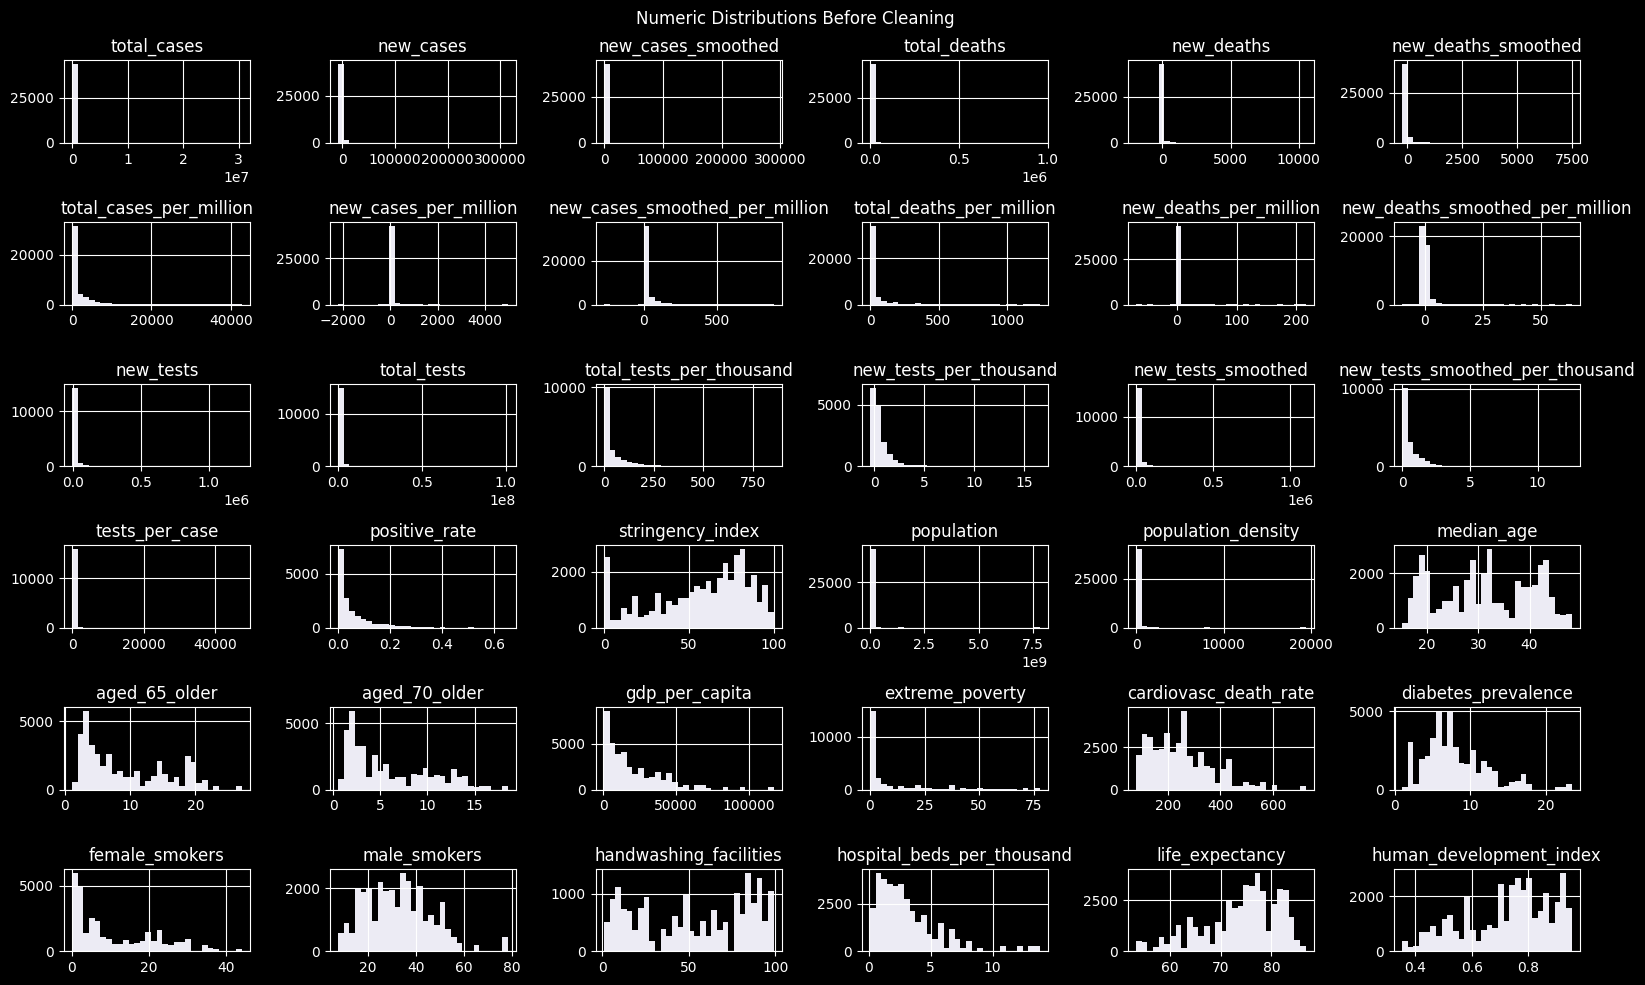

In [7]:
numeric_cols = df.select_dtypes(include="number").columns

df[numeric_cols].hist(figsize=(16,10), bins=30)
plt.suptitle("Numeric Distributions Before Cleaning")
plt.tight_layout()
plt.show()


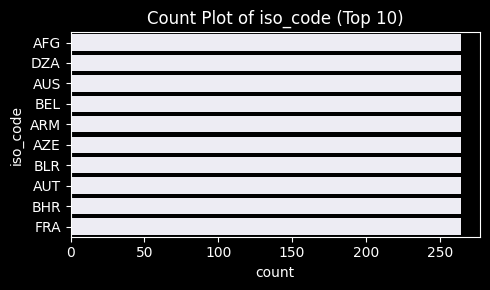

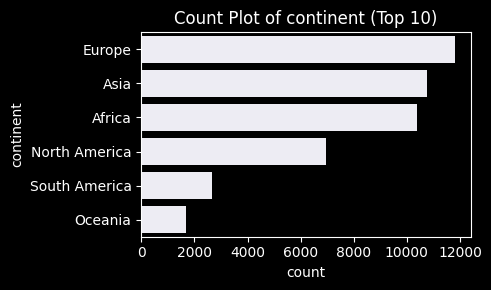

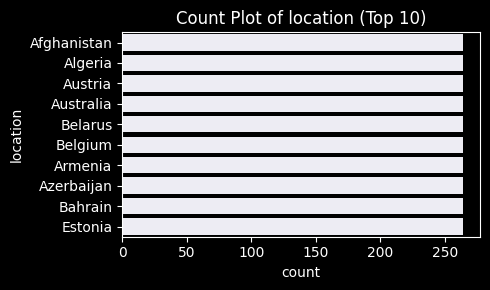

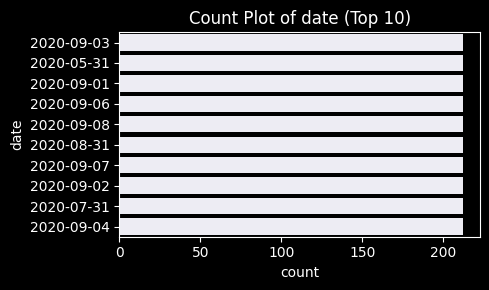

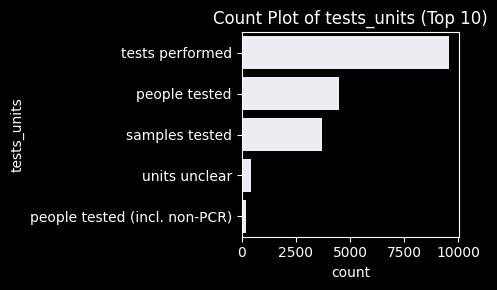

In [8]:
object_cols = df.select_dtypes(include="object").columns

for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(
        y=df[col],
        order=df[col].value_counts().head(10).index
    )
    plt.title(f"Count Plot of {col} (Top 10)")
    plt.tight_layout()
    plt.show()


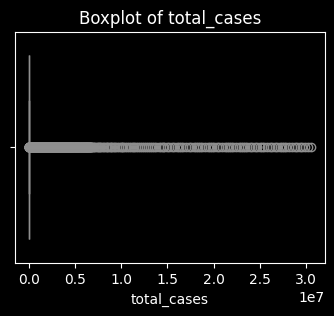

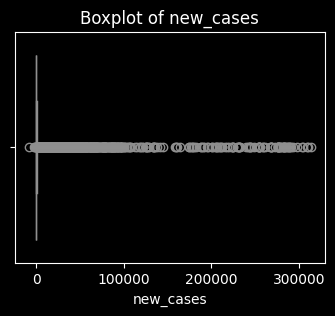

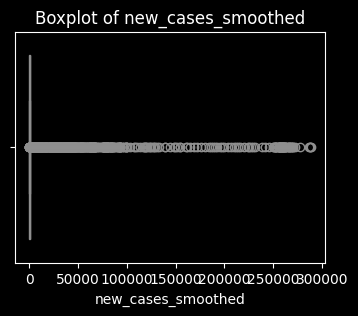

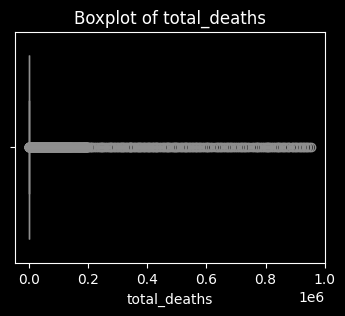

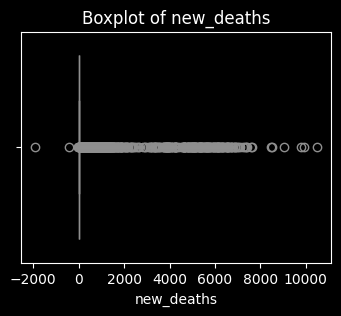

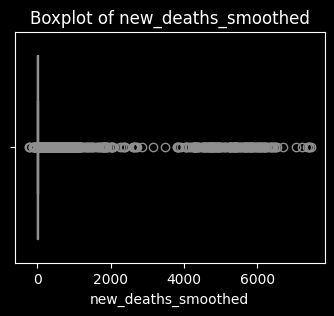

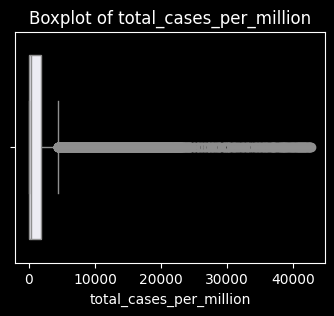

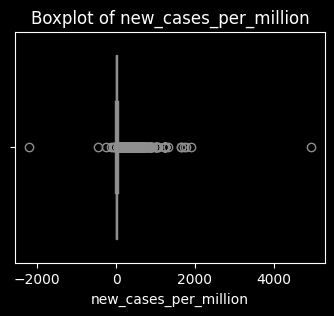

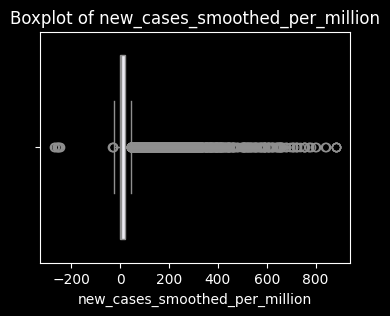

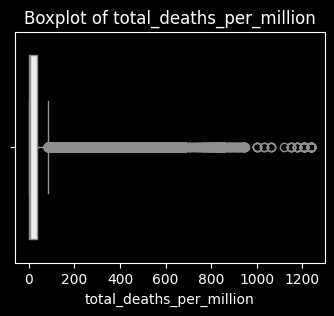

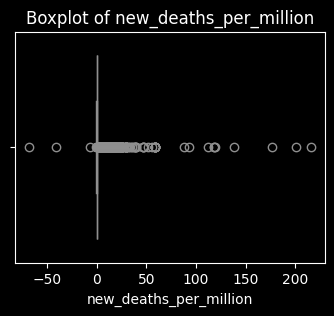

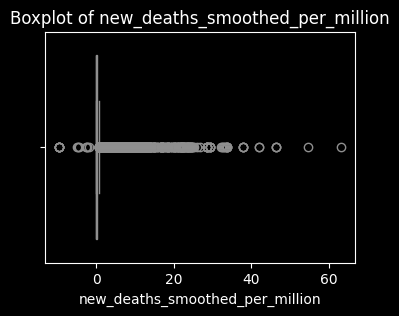

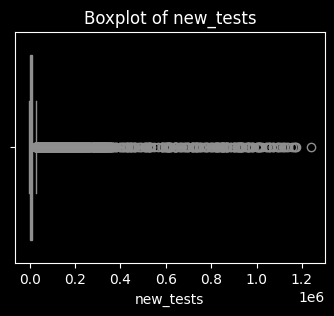

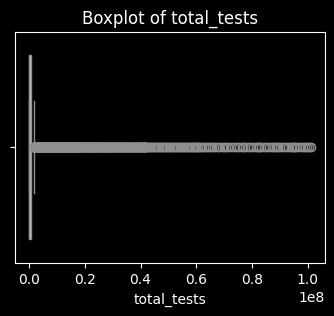

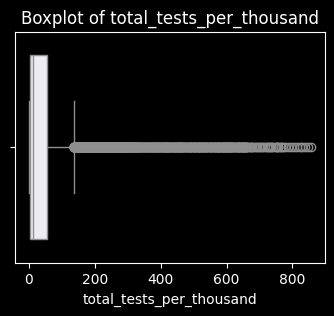

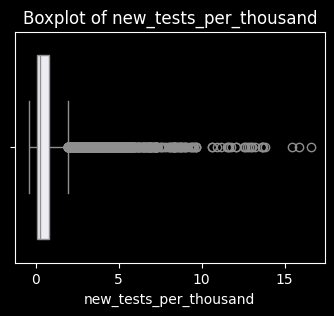

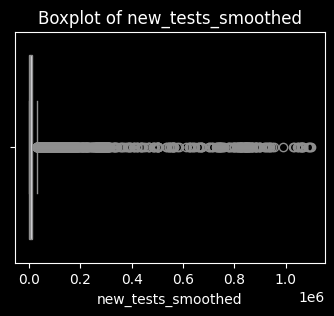

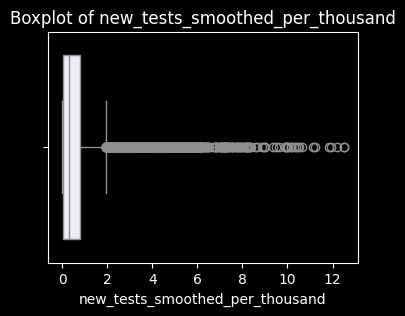

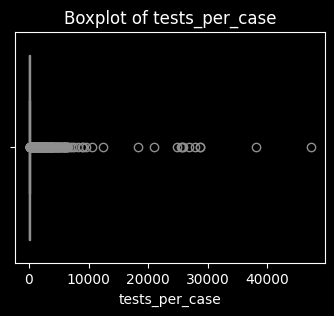

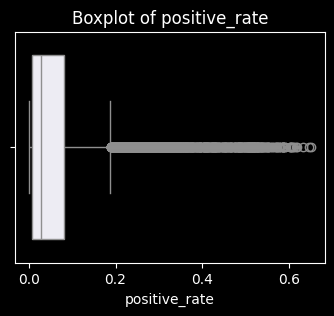

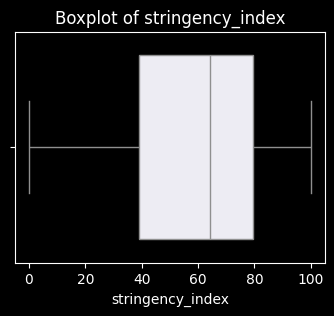

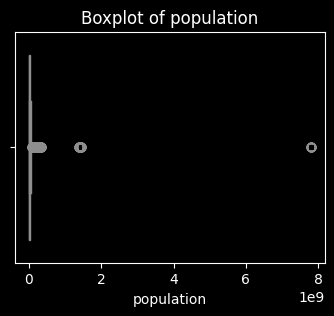

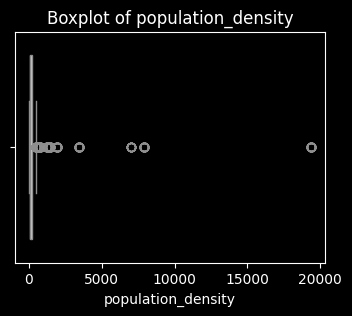

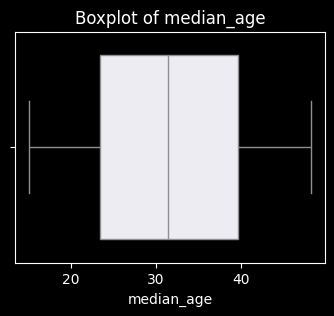

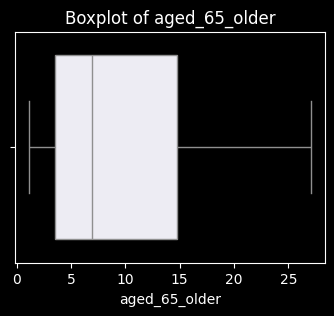

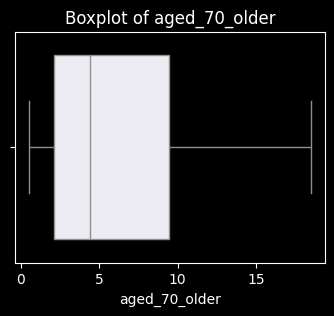

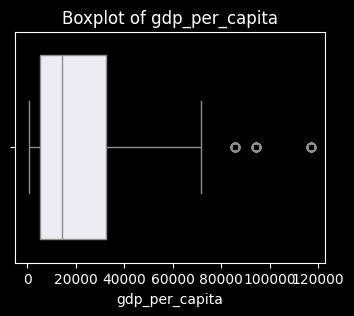

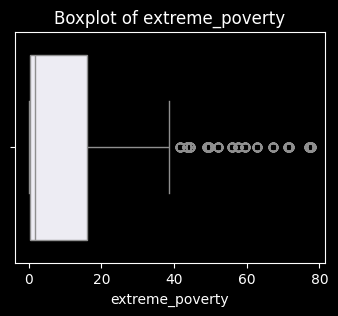

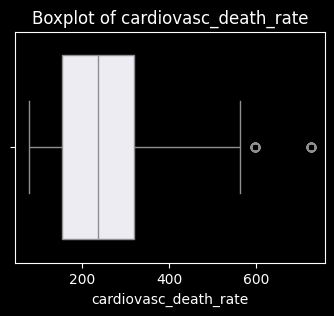

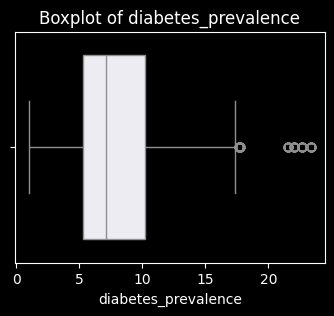

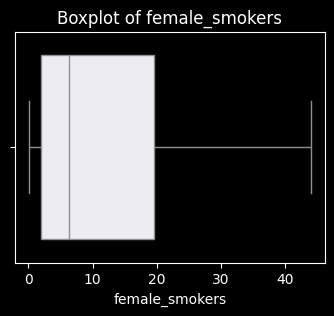

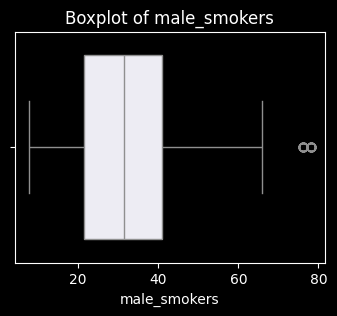

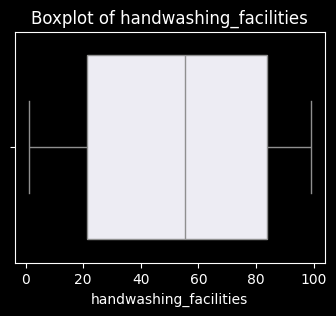

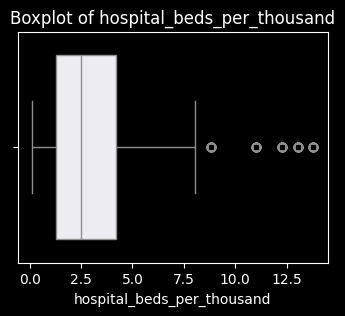

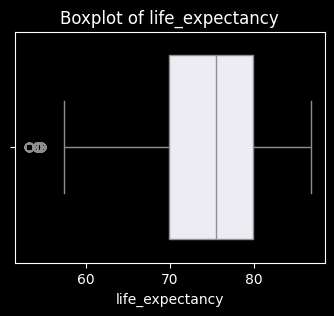

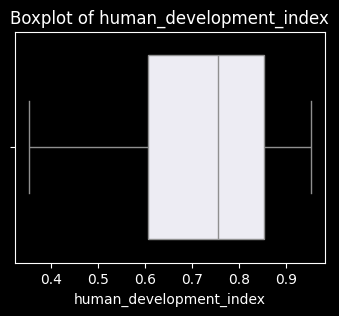

In [9]:
for col in numeric_cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### **Part 4: Data Wrangling & Cleaning**

In [10]:
# Convert date column
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Remove invalid dates
df = df.dropna(subset=["date"])

# Remove duplicates
df = df.drop_duplicates()

# Keep only country-level data
df = df[df["continent"].notna()]


In [11]:
numeric_cols = df.select_dtypes(include="number").columns
object_cols  = df.select_dtypes(include="object").columns

# Numeric → Median
for col in numeric_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Object → Mode
for col in object_cols:
    mode_value = df[col].mode()
    if not mode_value.empty:
        df[col] = df[col].fillna(mode_value[0])

### **Part 5: Outlier Handling**

In [12]:
def clip_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series.clip(lower, upper)

iqr_cols = [
    "new_cases",
    "new_deaths",
    "new_cases_per_million",
    "new_deaths_per_million",
    "positive_rate",
    "tests_per_case"
]

iqr_cols = [c for c in iqr_cols if c in df.columns]

for col in iqr_cols:
    df[col] = df.groupby("location")[col].transform(clip_iqr)


### **Part 6: EDA — AFTER CLEANING**

In [13]:
missing_ratio_after = df.isnull().mean().sort_values(ascending=False)
missing_ratio_after.head(15)

,0
iso_code,0.0
continent,0.0
location,0.0
date,0.0
total_cases,0.0
new_cases,0.0
new_cases_smoothed,0.0
total_deaths,0.0
new_deaths,0.0
new_deaths_smoothed,0.0


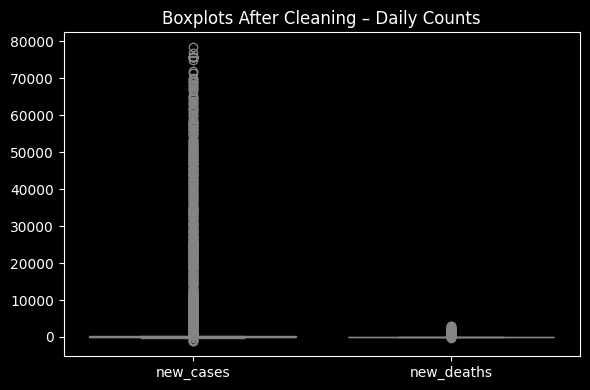

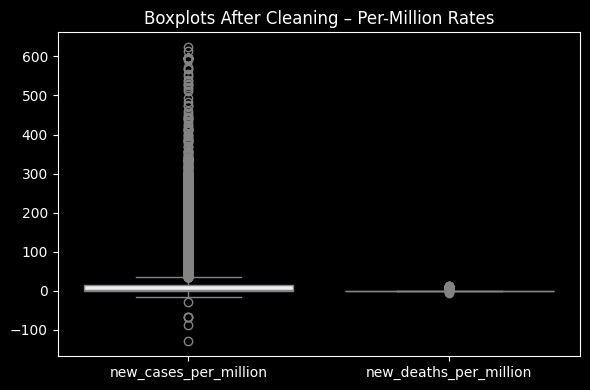

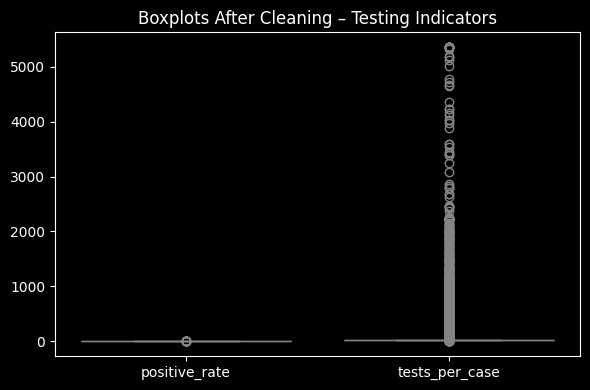

In [14]:
group1 = ["new_cases", "new_deaths"]
group2 = ["new_cases_per_million", "new_deaths_per_million"]
group3 = ["positive_rate", "tests_per_case"]

for g, title in zip(
    [group1, group2, group3],
    ["Daily Counts", "Per-Million Rates", "Testing Indicators"]
):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df[g])
    plt.title(f"Boxplots After Cleaning – {title}")
    plt.tight_layout()
    plt.show()


### **Part 7: Feature Engineering**

In [15]:
df["cfr"] = df["total_deaths"] / df["total_cases"]
df["active_cases"] = df["total_cases"] - df["total_deaths"]

df = df.sort_values(["location","date"])
df["total_cases_prev"] = df.groupby("location")["total_cases"].shift(1)
df["growth_rate"] = df["new_cases"] / (df["total_cases_prev"] + 1)

df.replace([np.inf, -np.inf], np.nan, inplace=True)

### **Part 8: Aggregation & EDA (Global & Regional)**

In [16]:
continent_daily = (
    df.groupby(["continent","date"])
    .agg({
        "new_cases":"sum",
        "new_deaths":"sum",
        "total_cases":"sum",
        "total_deaths":"sum",
        "population":"sum"
    })
    .reset_index()
)

continent_daily.head()

,continent,date,new_cases,new_deaths,total_cases,total_deaths,population
0,Africa,2019-12-31,0.0,0.0,0.0,0.0,352325033.0
1,Africa,2020-01-01,0.0,0.0,0.0,0.0,352325033.0
2,Africa,2020-01-02,0.0,0.0,0.0,0.0,352325033.0
3,Africa,2020-01-03,0.0,0.0,0.0,0.0,352325033.0
4,Africa,2020-01-04,0.0,0.0,0.0,0.0,352325033.0


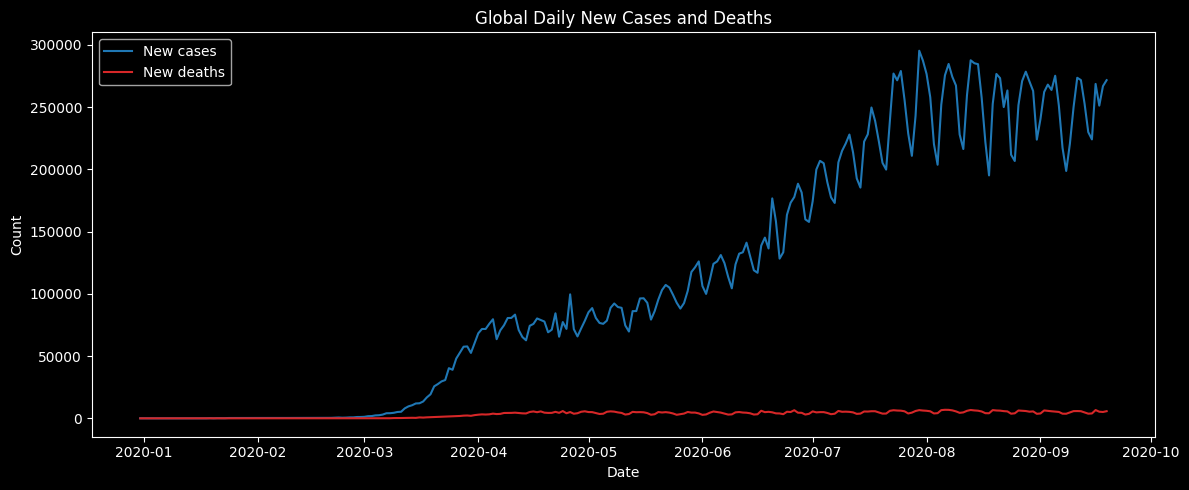

In [17]:
global_daily = (
    continent_daily.groupby("date")
    .agg({"new_cases":"sum", "new_deaths":"sum"})
    .reset_index()
)

# رسم الخطوط
plt.figure(figsize=(12,5))
plt.plot(global_daily["date"], global_daily["new_cases"], label="New cases", color="#1f77b4")
plt.plot(global_daily["date"], global_daily["new_deaths"], label="New deaths", color="#d62728")

# تنسيق الرسم
plt.legend()
plt.title("Global Daily New Cases and Deaths")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


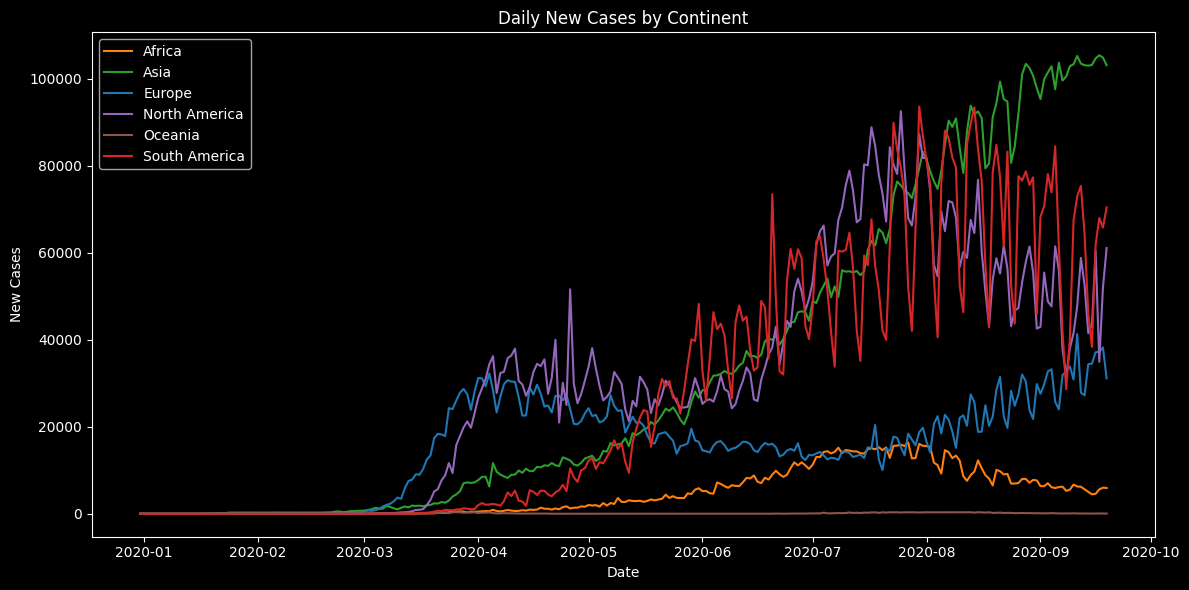

In [18]:
custom_colors ={
    "Europe": "#1f77b4",        # أزرق
    "Africa": "#ff7f0e",        # برتقالي
    "Asia": "#2ca02c",          # أخضر
    "South America": "#d62728", # أحمر
    "North America": "#9467bd", # بنفسجي
    "Oceania": "#8c564b"        # بني
}

plt.figure(figsize=(12,6))
for cont in continent_daily["continent"].unique():
    subset = continent_daily[continent_daily["continent"] == cont]
    plt.plot(
        subset["date"],
        subset["new_cases"],
        label=cont,
        color=custom_colors.get(cont)
    )

plt.legend()
plt.title("Daily New Cases by Continent")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.tight_layout()
plt.show()


### **Part 9: Country-Level Analysis**

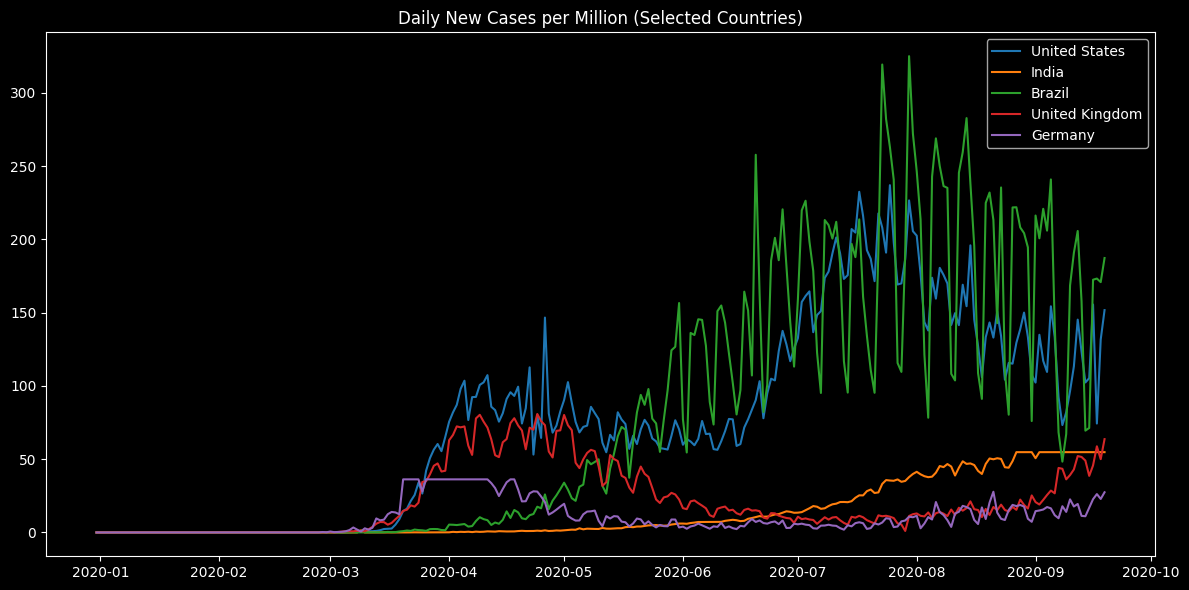

In [19]:
custom_colors = {
    "United States": "#1f77b4",       # أزرق
    "India": "#ff7f0e",               # برتقالي
    "Brazil": "#2ca02c",              # أخضر
    "United Kingdom": "#d62728",      # أحمر
    "Germany": "#9467bd"              # بنفسجي
}

sample_countries = [
    "United States","India","Brazil","United Kingdom","Germany"
]

sample_df = df[df["location"].isin(sample_countries)]

plt.figure(figsize=(12,6))
for c in sample_countries:
    subset = sample_df[sample_df["location"] == c]
    plt.plot(subset["date"], subset["new_cases_per_million"], label=c ,color=custom_colors[c])

plt.legend()
plt.title("Daily New Cases per Million (Selected Countries)")
plt.tight_layout()
plt.show()


### **Part 10: Correlation Analysis**

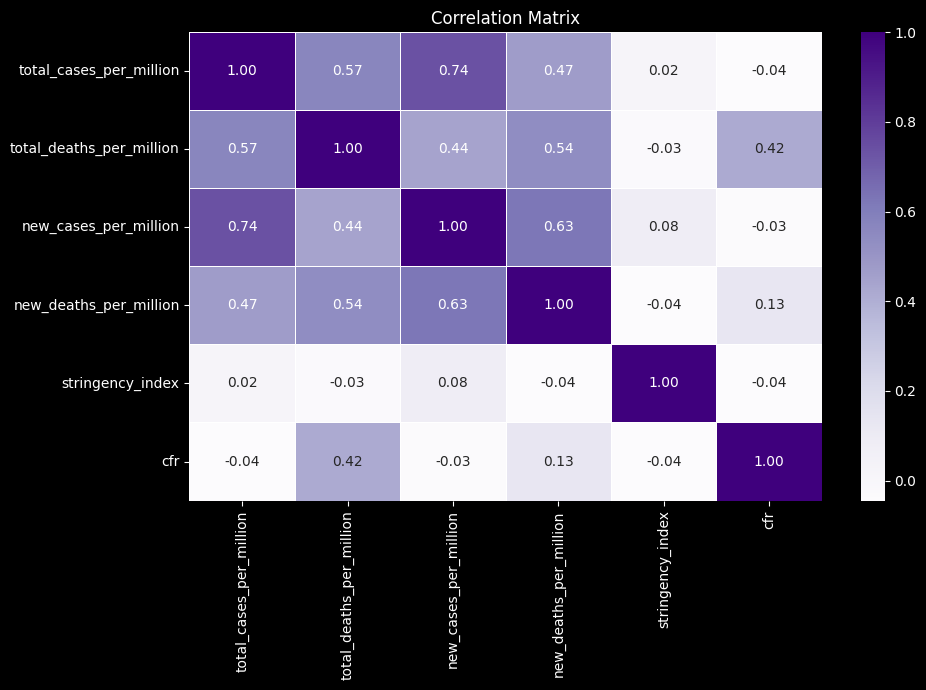

In [20]:
latest_df = (
    df.sort_values("date")
    .groupby("location")
    .tail(1)
)

corr_cols = [
    "total_cases_per_million",
    "total_deaths_per_million",
    "new_cases_per_million",
    "new_deaths_per_million",
    "stringency_index",
    "cfr"
]

corr_df = latest_df[corr_cols].dropna()

plt.figure(figsize=(10,7))
sns.heatmap(
    corr_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="Purples",
    linewidths=0.5
)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


### **Part 11: Feature Selection (Lasso)**

In [21]:
features = ["new_cases_per_million","stringency_index"]
target = "new_deaths_per_million"

fs_df = latest_df[features + [target]].dropna()

X = StandardScaler().fit_transform(fs_df[features])
y = fs_df[target]

lasso = Lasso(alpha=0.01, max_iter=5000)
lasso.fit(X, y)

pd.Series(lasso.coef_, index=features)


,0
new_cases_per_million,0.651333
stringency_index,-0.090552


### **Part 12: Probability & Distribution Fitting**

In [22]:
country = "United States"
country_df = df[df["location"] == country]

data = country_df["new_cases"]
data = data[(data.notna()) & (data > 0)]

mu, sigma = stats.norm.fit(data)
shape, loc, scale = stats.lognorm.fit(data, floc=0)


### **Part 13: Hypothesis Testing**

In [23]:
cutoff_date = pd.to_datetime("2020-06-01")

before = df[df["date"] < cutoff_date]["stringency_index"].dropna()
after = df[df["date"] >= cutoff_date]["stringency_index"].dropna()

t_stat, p_value = stats.ttest_ind(before, after, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -8.072775195002984
p-value: 7.101485327797302e-16


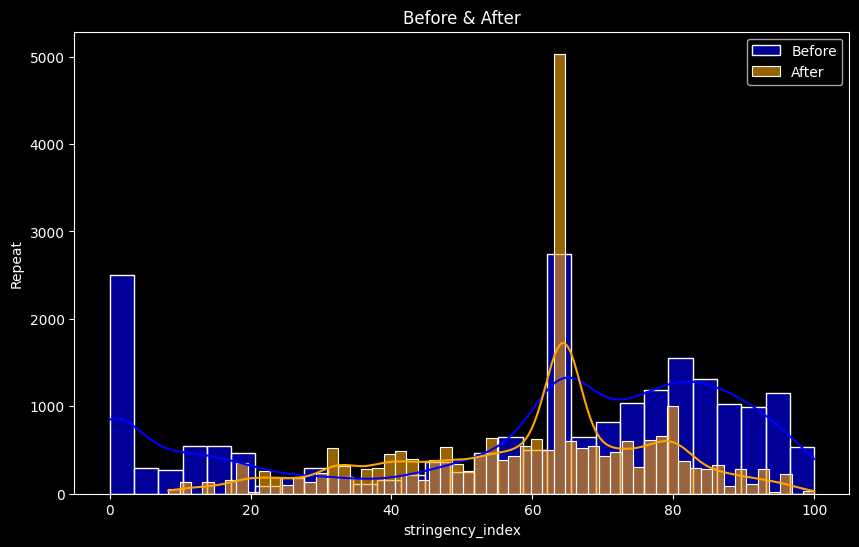

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(before, color="blue", label="Before", kde=True, alpha=0.6)
sns.histplot(after, color="orange", label="After", kde=True, alpha=0.6)
plt.xlabel("stringency_index")
plt.ylabel("Repeat")
plt.title("Before & After")
plt.legend()
plt.show()

### **Part 14: PCA — Dimensionality Reductions**

In [25]:
pca_features = [
    "total_cases_per_million",
    "total_deaths_per_million",
    "new_cases_per_million",
    "new_deaths_per_million",
    "cfr",
    "stringency_index"
]

pca_df = latest_df.dropna(subset=pca_features + ["continent"]).copy()

X = StandardScaler().fit_transform(pca_df[pca_features])

pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(X)

pca_df["PC1"] = components[:,0]
pca_df["PC2"] = components[:,1]


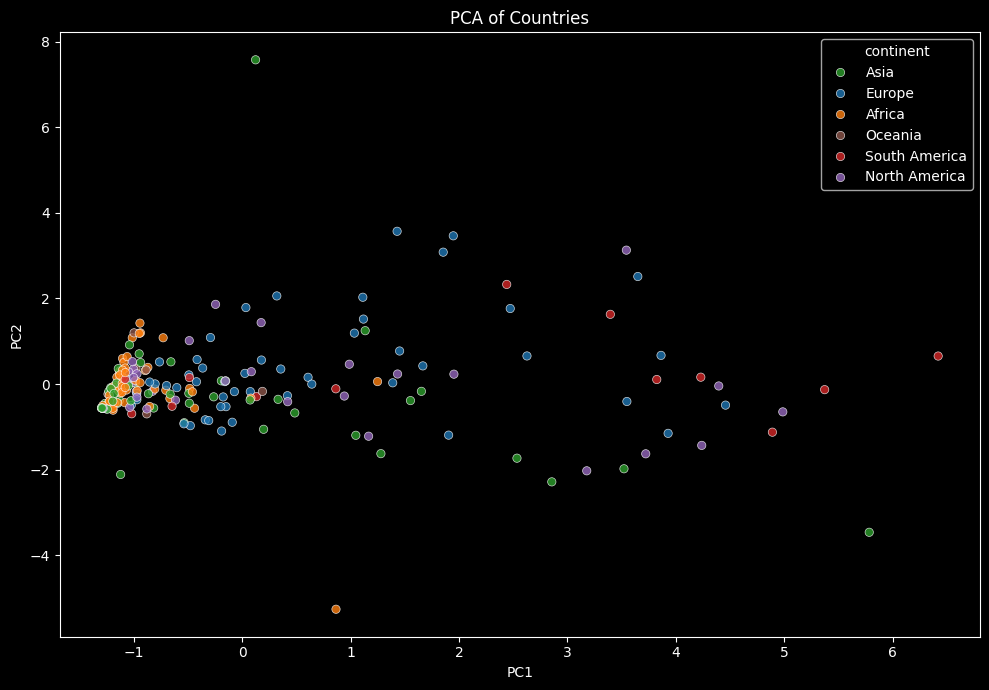

In [26]:
custom_palette = {
    "Europe": "#1f77b4",        # أزرق
    "Africa": "#ff7f0e",        # برتقالي
    "Asia": "#2ca02c",          # أخضر
    "South America": "#d62728", # أحمر
    "North America": "#9467bd", # بنفسجي
    "Oceania": "#8c564b"        # بني
}
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="continent",
    palette=custom_palette,
    alpha=0.8
)
plt.title("PCA of Countries")
plt.tight_layout()
plt.show()


### **Part 15: A cleaned dataset**

In [27]:
# Save cleaned dataset
df.to_csv("cleaned_covid_data.csv", index=False)
